# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# 1. Is the Distribution of Body Temperatures Normal?

## Defining functions first

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import pandas as pd
import time

def ecdf(data):
    #"""Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    x = np.sort(data) # x-data for the ECDF: x
    y = np.arange(1, n+1) / n  # y-data for the ECDF: y
    return x, y

def make_ecdf_plot(data, x_label, y_label, fig_no):
    x, y = ecdf(data)
    ideal_norm_dist = np.random.normal(np.mean(data), np.std(data), size=len(data))
    norm_x, norm_y = ecdf(ideal_norm_dist)
    plt.figure(fig_no)
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.plot(norm_x, norm_y, marker='.', linestyle='none', alpha=0.5)
    _ = plt.legend(('Actual', 'Simulated Normal'), loc='lower right')
    _ = plt.xlabel(x_label)
    _ = plt.ylabel(y_label)
    plt.margins(0.02)
    plt.axvline(np.mean(data), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(data), color='r', linestyle='dashed', linewidth=2)
    plt.show()

def make_histogram(data, x_label, y_label, fig_no, kde_var=False, **kwargs):
    plt.figure(fig_no, figsize=(8,5))
    #no_of_bins = int(len(data)**0.5) # Calculate bins sqrt(len(data))
    no_of_bins = 30
    x = sns.distplot(data, hist=True, kde=kde_var, rug=False)
    _ = plt.xlabel(x_label)
    _ = plt.ylabel(y_label)
    if 'xlimits' in kwargs:
        _ = plt.xlim(kwargs['xlimits'])
    else:
        plt.margins(0.02)
    
    if 'title' in kwargs:
        _ = plt.title(kwargs['title'], fontsize=16)
    
    plt.axvline(np.mean(data), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(data), color='r', linestyle='dashed', linewidth=1)
    
     
    ymin, ymax = plt.ylim()
    xmin, xmax = plt.xlim()
    yrange = ymax - ymin
    xrange = xmax - xmin
    mean_string = "Mean (black line) is {}".format(round(np.mean(data),2))
    median_string = "Median (red line) is {}".format(round(np.median(data),2))
    std_string = "Std. Dev is {}".format(round(np.std(data),2))
    plt.annotate(mean_string, xy = (np.mean(data), ymax), xytext = (xmin+xrange*0.7, ymin+yrange*0.7))
    plt.annotate(median_string, xy = (np.median(data), ymax), xytext = (xmin+xrange*0.7, ymin+yrange*0.6))
    plt.annotate(std_string, xy = (np.median(data), ymax), xytext = (xmin+xrange*0.7, ymin+yrange*0.5))
    
    if 'obs_statistic' in kwargs:
        plt.axvline(kwargs['obs_statistic'], color='b', linestyle='dashed', linewidth=1)
        plt.axvline(0-kwargs['obs_statistic'], color='b', linestyle='dashed', linewidth=1)
        plt.annotate('Observed Statistic in Blue Line', xy = (np.median(data), ymax), 
                     xytext = (xmin+xrange*0.1, ymin+yrange*0.5))
   
    plt.show()

def make_boxplot(data, x_label, y_label, fig_no):
    plt.figure(fig_no)
    sns.boxplot(data,  orient='h')
    _ = plt.ylabel(y_label)
    _ = plt.xlabel(x_label)
    plt.margins(0.02)
    plt.show()

def make_norm_probplot(data, title_var, fig_no):
    plt.figure(fig_no)
    res = stats.probplot(data, dist='norm', plot=plt)
    _ = plt.title(title_var)
    plt.show()
     
def bootstrap_sample(data, func, size=1):
    bootstrap_data = func(np.random.choice(data, size))
    return bootstrap_data

## Basic Overview of the Dataset

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

# Looking at the basic information of the data set.
display(df.describe())
display(df.info())

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


None

## Looking at the Temperature Data

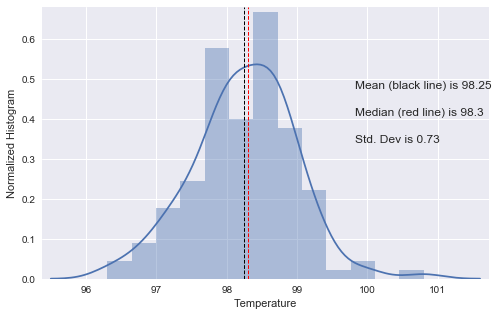

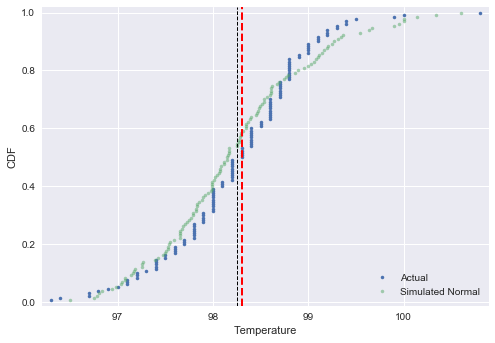

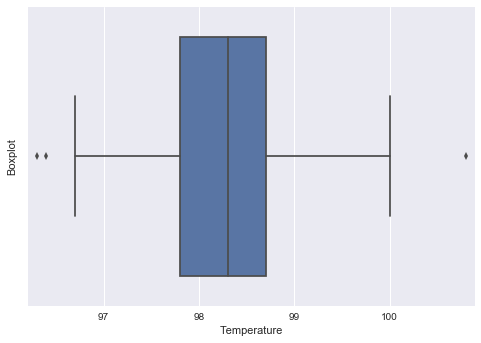

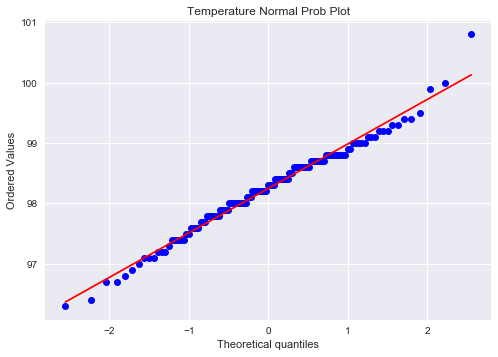

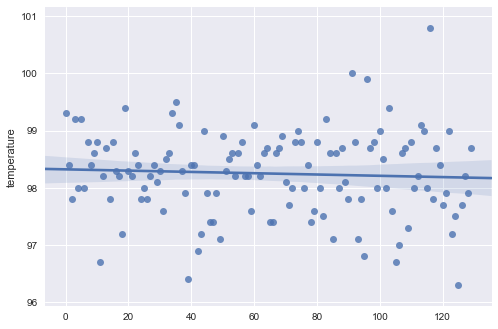

In [3]:
make_histogram(df['temperature'],'Temperature', 'Normalized Histogram', fig_no=2, kde_var=True) # Histogram
make_ecdf_plot(df['temperature'],'Temperature', 'CDF', fig_no=3) # ECDF (Emperical Cumulative Distribution Functions)
make_boxplot(df['temperature'],'Temperature', 'Boxplot', fig_no=4) # Boxplot
make_norm_probplot(df['temperature'], 'Temperature Normal Prob Plot', fig_no=5) # Normal Probability Plot

# Scatter Plot to see if there is any pattern in the data
plt.figure(6)
sns.regplot(df.index.values, df['temperature'])
plt.show()

### The normal probaility plot shows that the values fall along the theoritical quantiles line. There is some discrepancy at the low & high ends of the distribution showing some deviation from normality. Otherwise, the data set appears to be normally distributed. 

# 2. Is the sample size large? Are the observations independent?

There are three conditions for statistical inference [Link] (https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/a/conditions-inference-one-proportion)

1. Data have to come from random sample (or) randomized experiment.
   This appears to be the case here. There are no patterns in the data. See the last scatter plot in the previous code.
   
2. Sampling distribution needs to be normal. This means the sample set should have more than 30 observations. This data set has 130 samples > 30 needed.

3. Independent: In cases where there is no replacement (such as this case), the sample size shouldn't be more than 10% of the population. Given that we are studying the distribution of body temperatures, with more than 7 Billion population, we are definitely going to be < 10% of the population. This condition is easily met.

# 3. Is the true population mean 98.6 F?

## Using Bootstrap to estimate population mean

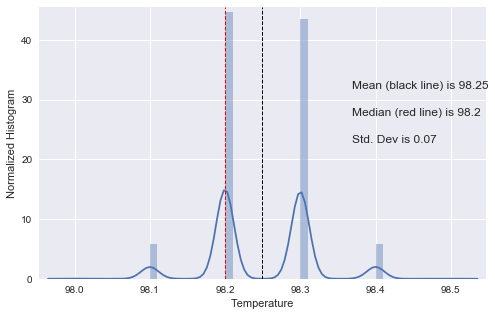

The percentage of observations with mean > 98.5 F is 0.0 %


In [4]:
no_of_bootstrap_samples = 10000
temperature_data = df['temperature']
bootstrap_mean_temp = np.empty(no_of_bootstrap_samples)
for i in range(no_of_bootstrap_samples):
    bootstrap_mean_temp[i] = round(bootstrap_sample(temperature_data, np.mean, size=len(temperature_data)), 1)
    # The above code gets a bootstrap sample, calculate its mean and rounds it off to one decimal point.

make_histogram(bootstrap_mean_temp,'Temperature', 'Normalized Histogram', fig_no=1, kde_var=True)
p_value = np.sum(bootstrap_mean_temp > 98.5)/no_of_bootstrap_samples
print('The percentage of observations with mean > 98.5 F is', p_value*100, '%')
    

## Frequentist Hypothesis Testing using Z-Distribution

In [5]:
def p_value_greater_z_mean(data, threshold):
    z_score = ( threshold - np.mean(data) ) / ( np.std(data)/np.sqrt(len(data)) )
    p_value = 1 - stats.norm.cdf(z_score)
    return p_value

alpha_value = 0.05
temp_threshold = [98.59, 98.61]
p_value = np.empty(2)
p_value[0] = p_value_greater_z_mean(temperature_data, temp_threshold[0])
p_value[1] = p_value_greater_z_mean(temperature_data, temp_threshold[1])

print('H0: Mean Body Temperature = 98.6 F +/- 0.01 F')
print('H1: Mean Body Temperature is not 98.6 F')
print('p-Value is ', (p_value[0]-p_value[1]))
print('Alpha Value is ', alpha_value)
print('Since p-value < Alpha, Reject H0')

H0: Mean Body Temperature = 98.6 F +/- 0.01 F
H1: Mean Body Temperature is not 98.6 F
p-Value is  4.30322284473e-08
Alpha Value is  0.05
Since p-value < Alpha, Reject H0


### T-test is used when the number of observations is < 30 and/or population standard deviation is unknown([link from Rutgers University Webpage](http://www.rci.rutgers.edu/~mmm431/quant_methods_S14/QM_Lecture9.pdfl)). In this case, the population standard deviation is unknown, so t-test is more appropriate.

## Frequentist Hypothesis Testing Using T-Distribution

In [6]:
def p_value_greater_t_mean(data, threshold):
    t_score = ( threshold - np.mean(data) ) / ( np.std(data)/np.sqrt(len(data)) )
    p_value = 1 - stats.t.cdf(t_score, df=len(data)-1)
    return p_value

alpha_value = 0.05
temp_threshold = [98.59, 98.61]
p_value = np.empty(2)
p_value[0] = p_value_greater_t_mean(temperature_data, temp_threshold[0])
p_value[1] = p_value_greater_t_mean(temperature_data, temp_threshold[1])

print('H0: Mean Body Temperature = 98.6 F +/- 0.01 F')
print('H1: Mean Body Temperature is not 98.6 F')
print('p-Value is ', (p_value[0]-p_value[1]))
print('Alpha Value is ', alpha_value)
print('Since p-value < Alpha, Reject H0')

H0: Mean Body Temperature = 98.6 F +/- 0.01 F
H1: Mean Body Temperature is not 98.6 F
p-Value is  1.69211841095e-07
Alpha Value is  0.05
Since p-value < Alpha, Reject H0


### Result did not change beteen z test & t test. This is due to two reasons:
1. 98.6 is significantly far away from the mean & median.
2. Sample size is sufficiently large for z & t test to provide same answer.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

## Perform frequentist z test

In [7]:
small_temp_sample = np.random.choice(temperature_data, size=10)
display(small_temp_sample)
alpha_value = 0.05
temp_threshold = [98.59, 98.61]
p_value = np.empty(2)
p_value[0] = p_value_greater_z_mean(small_temp_sample, temp_threshold[0])
p_value[1] = p_value_greater_z_mean(small_temp_sample, temp_threshold[1])

print('H0: Mean Body Temperature = 98.6 F +/- 0.1 F')
print('H1: Mean Body Temperature is not 98.6 F')
print('p-Value is ', (p_value[0]-p_value[1]))
print('Alpha Value is ', alpha_value)
print('Since p-value < Alpha, Reject H0')

array([ 98.8,  98.8,  97.4,  98.4,  96.7,  97.1,  99.2,  98. ,  97.9,  98.8])

H0: Mean Body Temperature = 98.6 F +/- 0.1 F
H1: Mean Body Temperature is not 98.6 F
p-Value is  0.00469897271847
Alpha Value is  0.05
Since p-value < Alpha, Reject H0


## Perform frequentist t-test on small sample

In [8]:
p_value = np.empty(2)
p_value[0] = p_value_greater_t_mean(small_temp_sample, temp_threshold[0])
p_value[1] = p_value_greater_t_mean(small_temp_sample, temp_threshold[1])

print('H0: Mean Body Temperature = 98.6 F +/- 0.1 F')
print('H1: Mean Body Temperature is not 98.6 F')
print('p-Value is ', (p_value[0]-p_value[1]))
print('Alpha Value is ', alpha_value)
print('Since p-value < Alpha, Reject H0')

H0: Mean Body Temperature = 98.6 F +/- 0.1 F
H1: Mean Body Temperature is not 98.6 F
p-Value is  0.00526769374073
Alpha Value is  0.05
Since p-value < Alpha, Reject H0


## There is not much difference between the t test and z test in this case. Both have come to the same conclusion that the mean is not 98.6 F.

1. Which one is the correct one to use? Since the sample size is less than 30, t-test is the correct one to use.
2. What do you notice? What does this tell you about the difference in application of the  t and  z statistic? In this case since the statistic being checked is extreme enough for both tests to give the same conclusion. However, z test should only be used in the event of large sample sizes.

# At what temperature should we consider someone's temperature to be "abnormal"?

## Using Bootstrap

1. Run 1,000 simulations of 100 sample sets.
2. Plot the KDE's of all the simulations. This range of KDE's seen in this plot is considered a representation of the population. From this the "abnormal" temperature will be chosen based on the point that is 2 standard deviations away from the mean. This gives us an 95% probability that some one's temperature is abnormal.

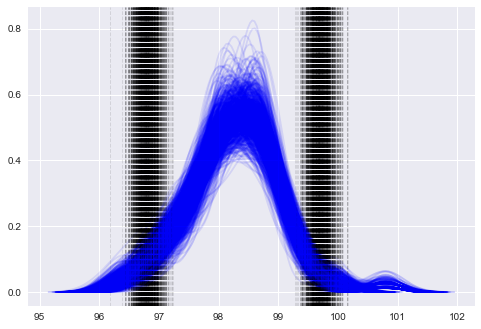

Time taken is 23.7 seconds
Range of Normal Temperatures is 96.8F to 99.7F


In [9]:
no_of_simulations = 1000
samples_per_simulation = 100
mean_simulations = np.empty(no_of_simulations)
abnormal_value_simulations = np.empty([2, no_of_simulations], dtype=float)

t0 = time.time()

plt.figure(1)
for i in range(no_of_simulations):
    sample = np.random.choice(temperature_data, size=samples_per_simulation)
    mean_simulations[i] = np.mean(sample)
    abnormal_value_simulations[0, i] = np.mean(sample) - (2 * np.std(sample))
    abnormal_value_simulations[1, i] = np.mean(sample) + (2 * np.std(sample))
    x = sns.distplot(sample, hist=False, kde_kws={"color": "b", "alpha": 0.1}, rug=False)
    plt.axvline(abnormal_value_simulations[0, i], color='k', linestyle='dashed', linewidth=1, alpha=0.1)
    plt.axvline(abnormal_value_simulations[1, i], color='k', linestyle='dashed', linewidth=1, alpha=0.1)

plt.show()

t1 = time.time()
print('Time taken is',round(t1-t0, 1), 'seconds')

abnormal_low_temperature = round(np.mean(abnormal_value_simulations[0,:]),1)
abnormal_high_temperature = round(np.mean(abnormal_value_simulations[1,:]),1)

print(f'Range of Normal Temperatures is {abnormal_low_temperature}F to {abnormal_high_temperature}F')


## Using 95% Confidence Internal

In [10]:
abnormal_low_temperature = round( np.mean(temperature_data) - (2*np.std(temperature_data)), 1)
abnormal_high_temperature = round( np.mean(temperature_data) + (2*np.std(temperature_data)), 1)

print('Mean of the lower 95% confidence intervals is {} F'.format(abnormal_low_temperature))
print('Mean of the upper 95% confidence intervals is {} F'.format(abnormal_high_temperature))

Mean of the lower 95% confidence intervals is 96.8 F
Mean of the upper 95% confidence intervals is 99.7 F


## The thresholds of abnormal temperatures were the same regardless of bootstrap (or) traditional 95% confidence interval estimates. 
## Temperatures < 96.8 F & > 99.7 can be considered abnormal.

# Is there a significant difference between males and females in normal temperature?

* Null Hypothesis: Mean of Body Temperatures in Females = Mean of Body Temperatures in Males
* Alternative Hypothesis: Mean of Body Temperatures in Females != Mean of Body Temperatures in Males
* Alpha = 0.05
* Observed Statistic = Mean of Body Temperatures in Females - Mean of Body Temperatures in Males in Original Dataset
* Assuming the null hypothesis is true, how many of the boot strap samples resulted in mean temp difference that is >= the observed statistic. This is the p-value.
    * Bootstrap sampling is choosen over Frequentist approach. This is because of one reason, number of observations in frequentist approach would be 65 per gender. This is not enough to draw general conclusions that pertains to the human population. With boot strap sampling, much larger observations could be generated. In this case, 1000 sample sets, each consisting of 65 observations were generated. More than 1000 sample sets could have been generated, however this was making the run much longer than 3-4 min. So, it was limited.
* If p-value < Alpha, then reject Null Hypothesis


## Using Bootstrap Approach

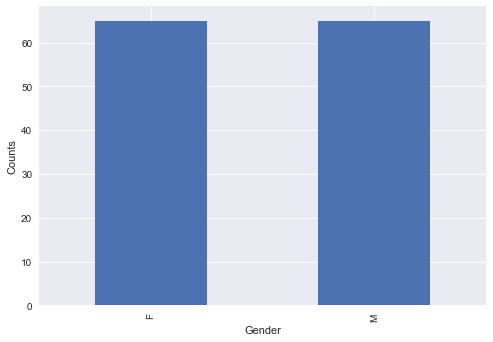

In [11]:
# How many males vs females in the dataset.
plt.figure(1)
df['gender'].value_counts().plot.bar() # There are equal number of male & female in the dataset.
_ = plt.xlabel('Gender')
_ = plt.ylabel('Counts')
plt.show()

In [12]:
original_data_males = df[df['gender']=='M']['temperature']
original_data_females = df[df['gender']=='F']['temperature']

original_male_temp_mean = np.mean(original_data_males)
original_male_temp_std = np.std(original_data_males)/(len(original_data_males)**0.5)
original_female_temp_mean = np.mean(original_data_females)
original_female_temp_std = np.std(original_data_females)/(len(original_data_females)**0.5)
original_mean_diff = original_female_temp_mean - original_male_temp_mean
print(f'Male Mean Temperature is {round(original_male_temp_mean, 1)} and Std Dev {round(original_male_temp_std, 2)} (F)')
print(f'Female Mean Temperature is {round(original_female_temp_mean, 1)} and Std Dev {round(original_female_temp_std, 2)} (F)')

Male Mean Temperature is 98.1 and Std Dev 0.09 (F)
Female Mean Temperature is 98.4 and Std Dev 0.09 (F)


p-value= 0.027 is < Alpha 0.05, Reject Null Hypothesis: No Difference in Male and Female Temperatures


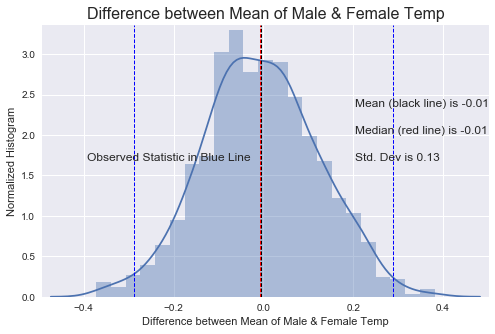

In [13]:
def bootstrap_two_categories(data, size_1, size_2):
    total_sample_set = np.random.choice(data, size=size_1+size_2)
    sample_1 = total_sample_set[:size_1]
    sample_2 = total_sample_set[size_1:]
    diff_means = np.mean(sample_1) - np.mean(sample_2)
    return diff_means

alpha = 0.05
no_of_simulations = 1000
diff_means = [bootstrap_two_categories(temperature_data, 65, 65) for i in range(no_of_simulations)]
p_value = np.sum(np.absolute(diff_means)>=abs(original_mean_diff))/no_of_simulations

if (p_value < alpha):
    print(f'p-value= {p_value} is < Alpha {alpha}, Reject Null Hypothesis'
          ': No Difference in Male and Female Temperatures')
else:
    print(f'p-value= {p_value} is <= Alpha {alpha}, Do not reject Null Hypothesis'
          ': No Difference in Male and Female Temperatures')

make_histogram(diff_means,'Difference between Mean of Male & Female Temp', 'Normalized Histogram', 
               fig_no=1, kde_var=True, title='Difference between Mean of Male & Female Temp',
              obs_statistic=original_mean_diff) # Histogram